[Quick Start | Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [1]:
import pandas as pd
from prophet import Prophet

/home/hope/workspace/hajimeteno-prophet/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [5]:
%%time

model = Prophet()
model.fit(df)

00:05:52 - cmdstanpy - INFO - Chain [1] start processing
00:05:52 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 120 ms, sys: 11.8 ms, total: 131 ms
Wall time: 358 ms


In [6]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
future_df.describe()

,ds
count,3270
mean,2012-07-17 10:33:14.862385152
min,2007-12-10 00:00:00
25%,2010-04-17 06:00:00
50%,2012-07-24 12:00:00
75%,2014-10-22 18:00:00
max,2017-01-19 00:00:00


In [8]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.460498,8.959297
3266,2017-01-16,8.535122,7.803643,9.213329
3267,2017-01-17,8.322549,7.559991,9.008276
3268,2017-01-18,8.155179,7.452414,8.883654
3269,2017-01-19,8.167136,7.430428,8.882462


In [9]:
forecast_df.describe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,3270,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.0,3270.0,3270.0,3270.000000
mean,2012-07-17 10:33:14.862385152,8.043646,7.431399,8.674720,8.028006,8.057443,0.009798,0.009798,0.009798,-0.000255,-0.000255,-0.000255,0.010052,0.010052,0.010052,0.0,0.0,0.0,8.053444
min,2007-12-10 00:00:00,7.188088,5.507119,6.762448,6.817150,7.472905,-1.238546,-1.238546,-1.238546,-0.311713,-0.311713,-0.311713,-0.926833,-0.926833,-0.926833,0.0,0.0,0.0,6.169159
25%,2010-04-17 06:00:00,7.742864,6.881111,8.133656,7.742864,7.742864,-0.516028,-0.516028,-0.516028,-0.072254,-0.072254,-0.072254,-0.506104,-0.506104,-0.506104,0.0,0.0,0.0,7.514199
50%,2012-07-24 12:00:00,8.159591,7.379163,8.624111,8.159591,8.159591,0.003096,0.003096,0.003096,-0.066669,-0.066669,-0.066669,-0.111446,-0.111446,-0.111446,0.0,0.0,0.0,8.004787
75%,2014-10-22 18:00:00,8.287037,7.992305,9.231899,8.287037,8.287037,0.496674,0.496674,0.496674,0.119636,0.119636,0.119636,0.501831,0.501831,0.501831,0.0,0.0,0.0,8.610334
max,2017-01-19 00:00:00,8.847549,9.624880,10.851327,8.847549,8.847549,1.467312,1.467312,1.467312,0.352288,0.352288,0.352288,1.115133,1.115133,1.115133,0.0,0.0,0.0,10.226021
std,NaN,0.386425,0.718924,0.715203,0.419995,0.362098,0.613999,0.613999,0.613999,0.189716,0.189716,0.189716,0.583313,0.583313,0.583313,0.0,0.0,0.0,0.715573


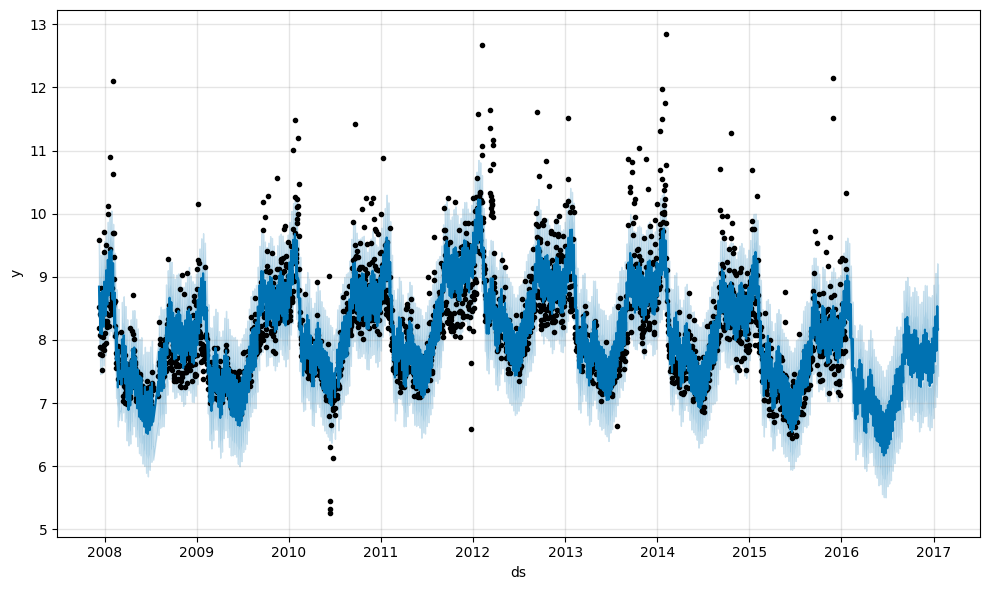

In [10]:
figure1 = model.plot(forecast_df)

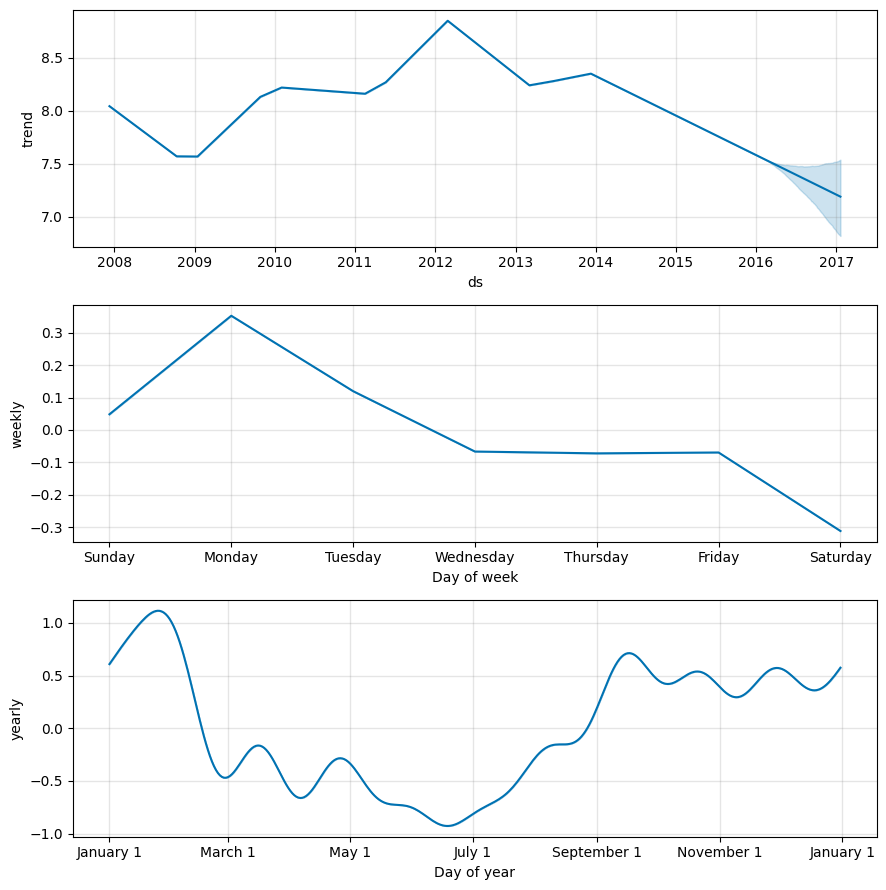

In [11]:
figure2 = model.plot_components(forecast_df)

In [12]:
from prophet.plot import plot_plotly, plot_components_plotly

figure3 = plot_plotly(model, forecast_df)

NameError: name 'go' is not defined